In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def codeToReadTxtFile1(filename):

    epoch_num = 0
    accuracy = 0
    precision = 0
    recall = 0
    f1 = 0
    outer_dictionary = {}
    dictionary = {}
    with open(filename, 'r') as file:
        lines = file.readlines()
        for i in range(len(lines)):

            line = lines[i].split()
            if (i%2 == 0):
                dictionary = {}

                epoch_num = int(line[1].split('/')[0])
                accuracy = float(line[7].split('%')[0])
                dictionary['train_accuracy'] = accuracy
                precision = float(line[10].split(',')[0])
                dictionary['train_precision'] = precision
                recall = float(line[13].split(',')[0])
                dictionary['train_recall'] = recall
                f1 = float(line[16])
                dictionary['train_f1'] = f1
                # print(epoch_num, accuracy, precision, recall, f1)

            else:
                
                accuracy = float(line[5].split('%')[0])
                dictionary['val_accuracy'] = accuracy
                precision = float(line[8].split(',')[0])
                dictionary['val_precision'] = precision
                recall = float(line[11].split(',')[0])
                dictionary['val_recall'] = recall
                f1 = float(line[14])
                dictionary['val_f1'] = f1

                outer_dictionary[epoch_num] = dictionary
    
    return outer_dictionary

In [3]:
def codeToReadTxtFile(filename):
    outer_dictionary = {}
    with open(filename, 'r') as file:
        lines = file.readlines()
        for i in range(0, len(lines), 2):  # Step 2 to process every other line
            epoch_num = int(lines[i].split('/')[0].split()[-1])
            train_accuracy = float(lines[i].split()[-1][:-1])
            val_accuracy = float(lines[i + 1].split()[-1][:-1])

            outer_dictionary[epoch_num] = {'train_accuracy': train_accuracy, 'val_accuracy': val_accuracy}
    return outer_dictionary


In [4]:
def codeToPlot1(df, column1, column2, path):

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df[column1], label=column1, marker='o', color='blue')
    plt.plot(df.index, df[column2], label=column2, marker='o', color='green')

    # Add titles and labels
    plt.title(f'Line Chart of {column1} and {column2}')
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.ylim(10, 28)
    # Add a legend
    plt.legend()

    plt.savefig(path)
    # Show the plot
    plt.show()

In [5]:
def codeToPlot(df, column1, column2, path):

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df[column1], label=column1, marker='o', color='blue')
    plt.plot(df.index, df[column2], label=column2, marker='o', color='green')

    # Add titles and labels
    plt.title(f'Line Chart of {column1} and {column2}')
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.ylim(10, 28)
    # Add a legend
    plt.legend()

    plt.savefig(path)
    # Show the plot
    plt.show()

In [6]:
df = pd.DataFrame.from_dict(codeToReadTxtFile1("WithoutCoTRM_BERT_VIT.txt"), orient='index')
df

,train_accuracy,train_precision,train_recall,train_f1,val_accuracy,val_precision,val_recall,val_f1
1,14.166667,0.071951,0.141667,0.081800,18.020833,0.032475,0.180208,0.055033
2,19.583333,0.072268,0.195833,0.101049,20.416667,0.041684,0.204167,0.069233
3,19.270833,0.083107,0.192708,0.116088,17.604167,0.052750,0.176042,0.081176
4,18.958333,0.149036,0.189583,0.164288,20.312500,0.087387,0.203125,0.118279
5,21.875000,0.192024,0.218750,0.197699,21.458333,0.091643,0.214583,0.123528
6,23.750000,0.215722,0.237500,0.219600,23.125000,0.107921,0.231250,0.146198
7,21.875000,0.201222,0.218750,0.204026,20.729167,0.085029,0.207292,0.118498
8,20.104167,0.177017,0.201042,0.179647,21.354167,0.095366,0.213542,0.129122
9,21.250000,0.193438,0.212500,0.197897,22.083333,0.101936,0.220833,0.138717
10,21.041667,0.188296,0.210417,0.190895,23.541667,0.107712,0.235417,0.145400


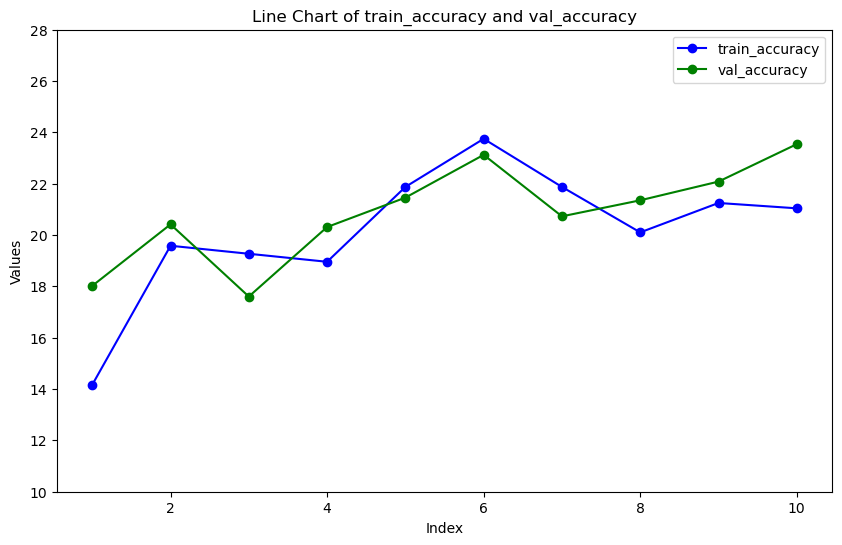

In [7]:
codeToPlot(df, 'train_accuracy', 'val_accuracy', 'accuracy_plot_Without_CoTRM_ViTBERT.png')